1. csv 폴더 안에 있는 drinks.csv 파일 로드 
2. 결측치를 확인 
3. continent 컬럼에 결측치 존재 -> 결측치를 'OT' 채워준다. 
4. 컬럼의 이름을 변경 -> ['국가', '맥주소비량', '증류주소비량', '와인소비량', '도수', '대륙']
5. 대륙별 맥주소비량의 평균, 최소, 최대, 합계 출력
6. 도수 컬럼의 평균 값보다 대륙별 도수의 평균이 높은 대륙을 출력

In [ ]:
import pandas as pd

In [ ]:
drinks = pd.read_csv('../csv/drinks.csv')
drinks.head()

In [ ]:
# 결측치를 확인 
drinks.info()

In [ ]:
drinks.isna().sum()

In [ ]:
# continent 컬럼에 결측치를 'OT'로 대체
drinks['continent'] = drinks['continent'].fillna('OT')

In [ ]:
drinks.isna().sum()

In [ ]:
# 컬럼의 이름을 변경 
drinks.rename(columns={
    'country' : '국가', 
    'beer_servings' : '맥주소비량', 
    'spirit_servings' : '증류주소비량', 
    'wine_servings' : '와인소비량', 
    'total_litres_of_pure_alcohol' : '도수', 
    'continent' : '대륙'
}, inplace=True)

In [ ]:
# 대륙별 맥주소비량의 평균, 최소, 최대, 합계
group_data = drinks[['대륙', '맥주소비량', '와인소비량']].groupby('대륙').agg(['min', 'max', 'mean', 'sum'])

In [ ]:
group_data['와인소비량']['max']

In [ ]:
# 멀티 컬럼의 데이터프레임에서 특정 스리즈 데이터를 추출
group_data['맥주소비량']['mean']

In [ ]:
drinks[['대륙', '맥주소비량']].groupby('대륙').describe()

In [ ]:
# 전체 데이터에서 도수 컬럼의 평균보다 대륙 별 도수의 평균이 높은 대륙은 어디인가?

# 전체 데이터의 도수의 평균
mean_data = drinks['도수'].mean()

In [ ]:
# 대륙별 도수 평균 데이터 생성
group_data2 = drinks[['대륙', '도수']].groupby('대륙').mean()
group_data2

In [ ]:
flag = group_data2['도수'] > mean_data

In [ ]:
group_data2.loc[flag]

In [ ]:
drinks.index = drinks.index+1
drinks

In [ ]:
# 과연 우리나라는 술 소비량이 어느정도인가?
# 술 소비량이 가장 많은 국가는 어디인가?

# 총술소비량 컬럼을 생성 -> 맥주소비량 + 와인소비량 + 증류주소비량
# 총술소비량 내림차순 정렬
# 인덱스를 초기화하고 기존의 인덱스는 제거 

# top10을 출력하고

# 우리나라는 몇위에 있는가?

In [ ]:
# 총술소비량 파생변수 생성
drinks['총술소비량'] = drinks['맥주소비량'] + drinks['와인소비량'] + drinks['증류주소비량']
drinks.head()

In [ ]:
drinks.sort_values('총술소비량', ascending=False, inplace=True)

In [ ]:
# 인덱스를 초기화하고 기존의 인덱스는 제거 
drinks.reset_index(drop=True, inplace=True)

In [ ]:
# 상위의 10개 국가를 확인 
drinks.head(10)

In [ ]:
drinks.tail(10)

In [ ]:
drinks.iloc[:10]

In [ ]:
drinks[-10:]

In [ ]:
# 우리나라는 몇위인가?
flag = drinks['국가'] == 'South Korea'

In [ ]:
drinks.loc[flag]

In [ ]:
# value들의 빈도수를 체크하는 함수 
drinks['국가'].value_counts()

In [52]:
# 총술소비량 바형 그래프 표시
import matplotlib.pyplot as plt

In [58]:
drinks.loc[drinks['국가'] == 'South Korea'].index[0]

98

In [59]:
drinks.loc[drinks['국가'] == 'South Korea', '총술소비량']

98    165
Name: 총술소비량, dtype: int64

c:\Users\EZEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
c:\Users\EZEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
c:\Users\EZEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


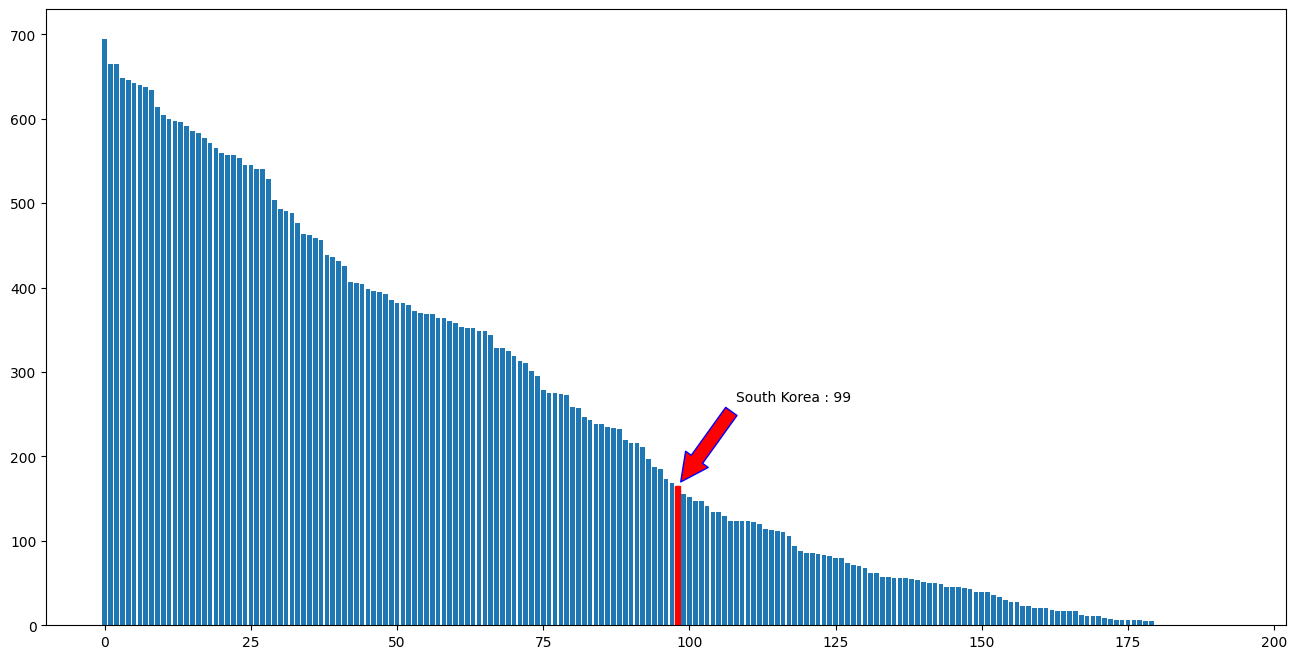

In [66]:
x = drinks.index
y = drinks['총술소비량']

# 한국 데이터의 인덱스 값을 추출
korea_index = drinks.loc[drinks['국가'] == 'South Korea'].index[0]
# 한국 데이터의 총술소비량 데이터 추출
korea_total = drinks.loc[drinks['국가'] == 'South Korea', '총술소비량']

plt.figure(figsize=(16, 8))
bar_list = plt.bar(x, y)
# 특정 위치의 막대를 설정 변경 -> 막대의 색을 빨간색으로 변경
bar_list[korea_index].set_color('r')

# 그래프에 주석을 추가 
plt.annotate(
    'South Korea : ' + str(korea_index + 1), # 주석의 텍스트
    xytext= (korea_index + 10, korea_total + 100), # 텍스트의 위치
    xy = (korea_index, korea_total),  # 주석이 가르키는 막대의 위치
    # 화살표를 추가
    arrowprops= dict(
        facecolor = 'r', # 화살표의 내부의 색을 표시
        edgecolor = 'b', # 화살표의 테두리 색을 지정
        headwidth = 20, # 화살표의 머리의 너비
        headlength = 20, # 화살표 머리의 길이
        width = 10, # 화살표 꼬리의 너비 
        shrink = 0.05 # 화살표와 주석 사이의 거리 
    )
)


plt.show()